## Lab 3 Report

Hsuan-Chung Hung, Scott Lin, Charles Tung Fang

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary



## Assignment 1 --  Convolving Signals 

In [36]:
# Assignment 1 - Time Shift Operation

# Part A
# x: input signal vector
# fs: sampling rate (in Hz)
# t0: time shift 
# returns t: time samples vector corresponding to y: scaled signal
def timeshift(x, fs, t0):
    n0 = abs(t0) * fs
    pause = np.zeros(int(n0), dtype = np.int16)
    if t0 < 0:
        y = np.concatenate([pause, x])
        t = np.arange(0, len(y), 1) * (1/fs)
    else:
        y = np.concatenate([x[int(n0) : len(x)], pause])
        t = np.arange(0, len(y), 1) * (1/fs)
    return y[0:int(4*fs) + 1], t

<IPython.core.display.Javascript object>


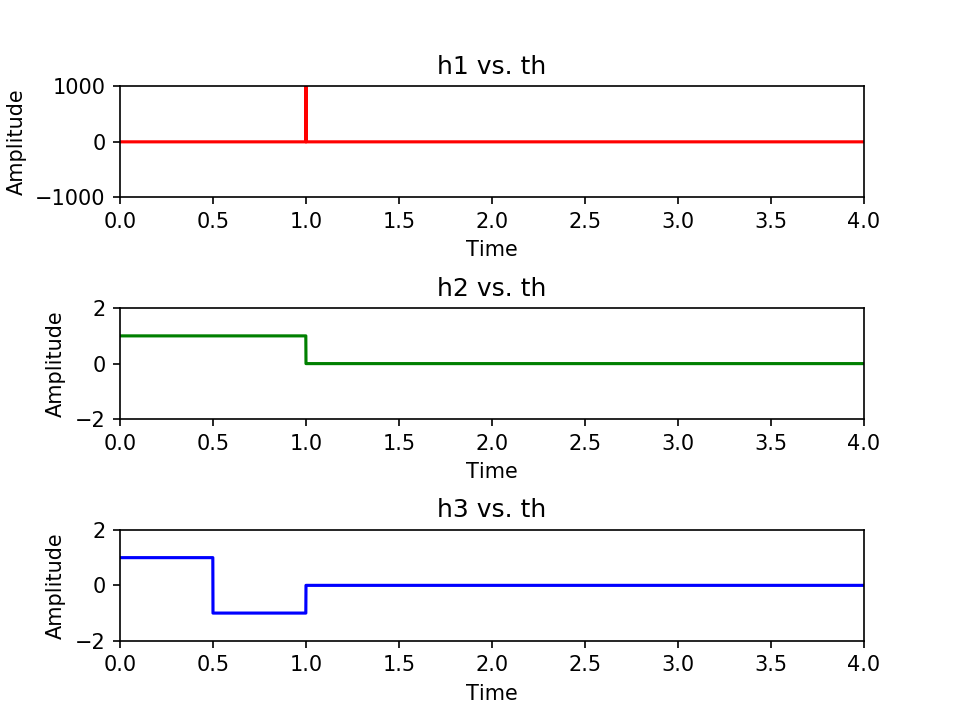

<IPython.core.display.Javascript object>


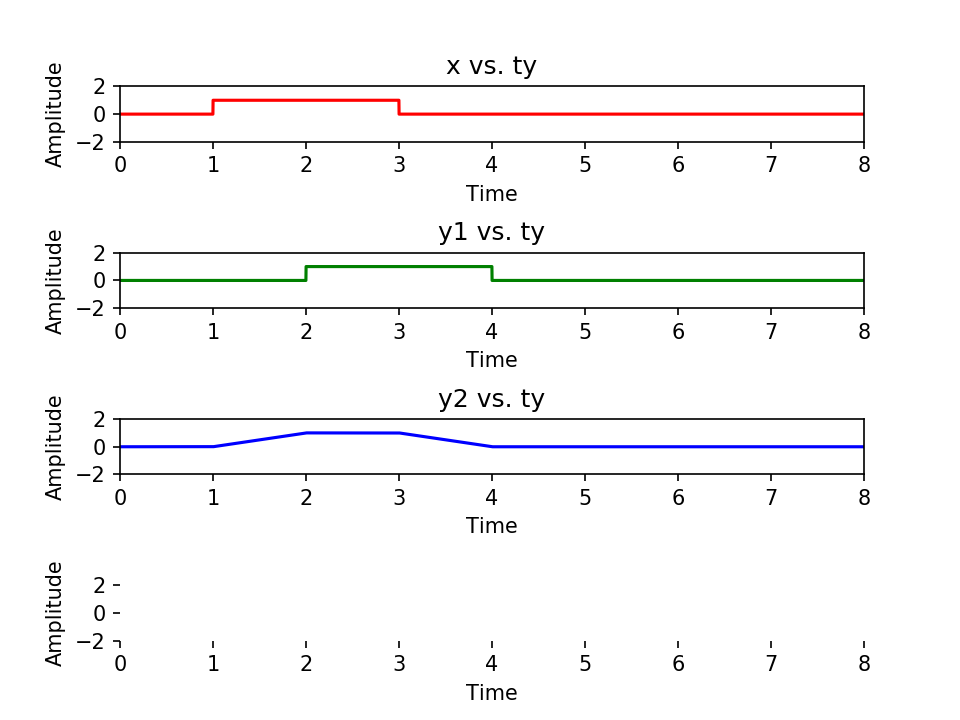

In [60]:
# Assignment 1 - Convolving Signals

# Part A
fs = 1000
th = np.arange(0, 4+1/(2*fs), 1/fs)
u = np.heaviside(th, 1)
impluse_h1 = int(1 * fs)

x1, t1 = timeshift(u, fs, -1)
x2, t2 = timeshift(u, fs, -3)
x = np.subtract(x1, x2)

h1 = np.zeros(len(u))
h1[impluse_h1] = fs

h2 = np.subtract(u, x1)

x3, t3 = timeshift(u, fs, -0.5)
x4, t4 = timeshift(u, fs, -1)
h3 = np.subtract(u, 2*x3)
h3 = np.add(h3, x4)

# Part B
fig = plt.figure(1)
fig.subplots_adjust(hspace = 1, wspace = 0.7)

th = np.arange(0, 4.0001, 1/fs)

plt.subplot(3, 1, 1)
plt.title('h1 vs. th')
plt.plot(th, h1, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 4)
plt.ylim(-fs, fs)

plt.subplot(3, 1, 2)
plt.title('h2 vs. th')
plt.plot(th, h2, color = 'g')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 4)
plt.ylim(-2, 2)

plt.subplot(3, 1, 3)
plt.title('h3 vs. th')
plt.plot(th, h3, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 4)
plt.ylim(-2, 2)
plt.show()

# Part C
y1 = np.convolve(x, h1)/fs
y2 = np.convolve(x, h2)/fs
y3 = np.convolve(x, h3)/fs

# Part D
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 2, wspace = 1)

ty = np.arange(0, 8+1/(2*fs), 1/fs)
x = np.concatenate([x, np.zeros(4000)])

plt.subplot(4, 1, 1)
plt.title('x vs. ty')
plt.plot(ty, x, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 8)
plt.ylim(-2, 2)

plt.subplot(4, 1, 2)
plt.title('y1 vs. ty')
plt.plot(ty, y1, color = 'g')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 8)
plt.ylim(-2, 2)

plt.subplot(4, 1, 3)
plt.title('y2 vs. ty')
plt.plot(ty, y2, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 8)
plt.ylim(-2, 2)

plt.subplot(4, 1, 4)
plt.title('y3 vs. ty')
plt.plot(ty, y3, color = 'p')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 8)
plt.ylim(-2, 2)
plt.show()


### Discussion

## Assignment 2 -- Revisiting Time Delay Transformation

<IPython.core.display.Javascript object>


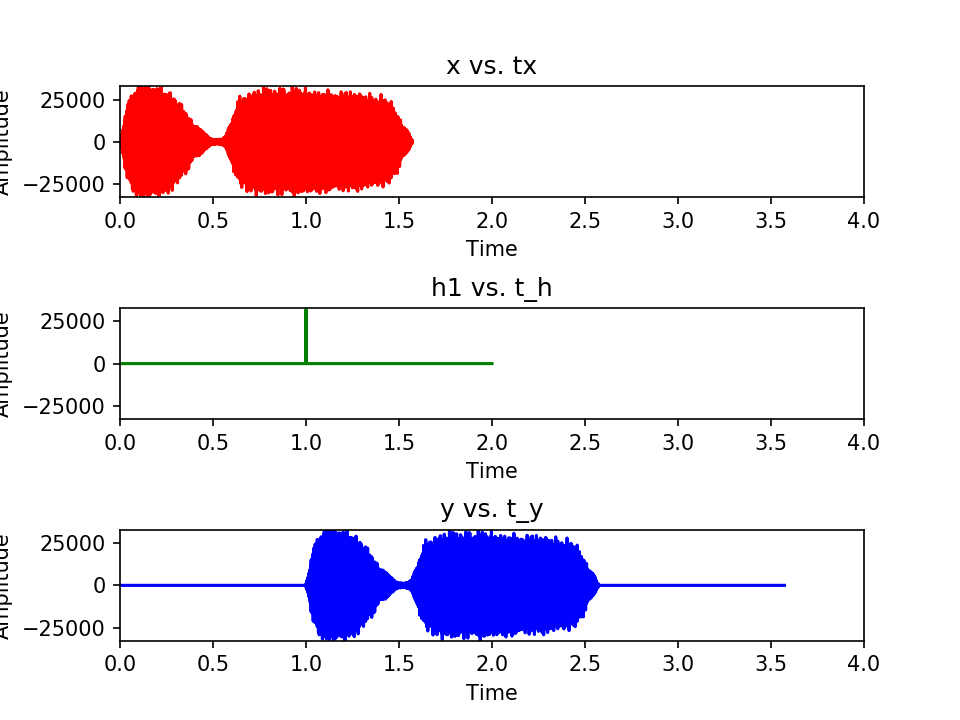

In [59]:
# Assignment2 -- Revisiting Time Delay Transformation

# Part A
fs, x = wav.read('train32.wav')
t_x = np.arange(0, len(x), 1) * (1 / fs)

# Part B
hd = np.zeros(2 * fs)
hd[fs] = fs
t_h = np.arange(0, 2, 1/fs)

# Part C
y = np.convolve(x, hd)/fs
t_y = np.arange(0, len(y), 1) * 1/fs

# Part D
fig = plt.figure(3)
fig.subplots_adjust(hspace = 1, wspace = 0.7)

th = np.arange(0, 4.0001, 1/fs)

yall = np.concatenate([y, x])

plt.subplot(3, 1, 1)
plt.title('x vs. tx')
plt.plot(t_x, x, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 4)
plt.ylim(min(yall), max(yall))

plt.subplot(3, 1, 2)
plt.title('h1 vs. t_h')
plt.plot(t_h, hd, color = 'g')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 4)
plt.ylim(min(yall), max(yall))

plt.subplot(3, 1, 3)
plt.title('y vs. t_y')
plt.plot(t_y, y, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0, 4)
plt.ylim(min(yall), max(yall))
plt.show()

### Discussion
The amplitude of y(t) will be extremely large. The sound would be very loud

## Assignment 3 -- Audio File Realignment

In [85]:
# Assignment 3 -- Audio File Realignment

# Part A
fs, x1 = wav.read('s3_1.wav')
x1 = x1[:,1]
fs, x2 = wav.read('s3_2.wav')
x2 = np.ravel(x2)
fs, x3 = wav.read('s3_3.wav')
x3 = x3[:,1]
tx = np.arange(0, 3, 1/fs)

# Part B
impluse_h1 = int(1 * fs)
impluse_h3 = int(2 * fs)

h1 = np.zeros(len(tx))
h2 = np.zeros(len(tx))
h3 = np.zeros(len(tx))

h1[impluse_h1] = fs
h2[0] = 10 * fs
h3[impluse_h3] = fs

# Part C
y1 = np.convolve(x1, h1)/fs
y2 = np.convolve(x2, h2)/fs
y3 = np.convolve(x3, h3)/fs

# Part D
max_length = max(len(y1), len(y2), len(y3))
pause1 = np.zeros(max_length - len(y1), dtype = np.int16)
pause2 = np.zeros(max_length - len(y2), dtype = np.int16)
pause3 = np.zeros(max_length - len(y3), dtype = np.int16)

y1 = np.concatenate([y1, pause1])
y2 = np.concatenate([y2, pause2])
y3 = np.concatenate([y3, pause3])

y4 = np.add(y1, y2, y3)
y4 = np.int16(y4)
play_obj = sa.play_buffer(y4, 1, 2, fs)
play_obj.wait_done()